# Logistic Regression

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [11]:
glass = pd.read_csv('data/glass.csv')

In [12]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [13]:
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

In [14]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Visualize elements of this table

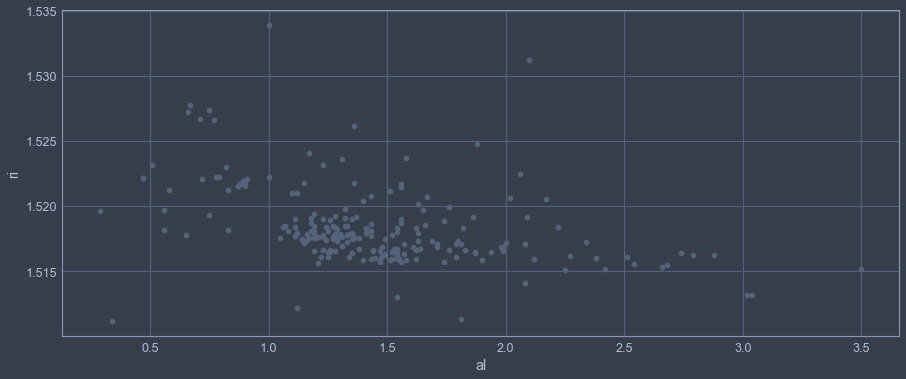

In [15]:
glass.plot(kind='scatter', x = 'al', y = 'ri',figsize=(15,6), s = 30)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# set up X and y , x being the al and y being ri
feature_cols = ['al']
X = glass[feature_cols]
y = glass['ri']
# instatntiate a Linear Regression model
linreg = LinearRegression()
# fit it 
linreg.fit(X, y)
# save the prediction results using X into a variable called y_pred
y_pred = linreg.predict(X)

In [21]:
# Create a new column in the glass dataset with the prediction
glass['y_pred'] = y_pred

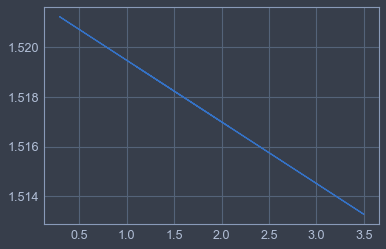

In [22]:
plt.plot(glass.al, glass.y_pred)

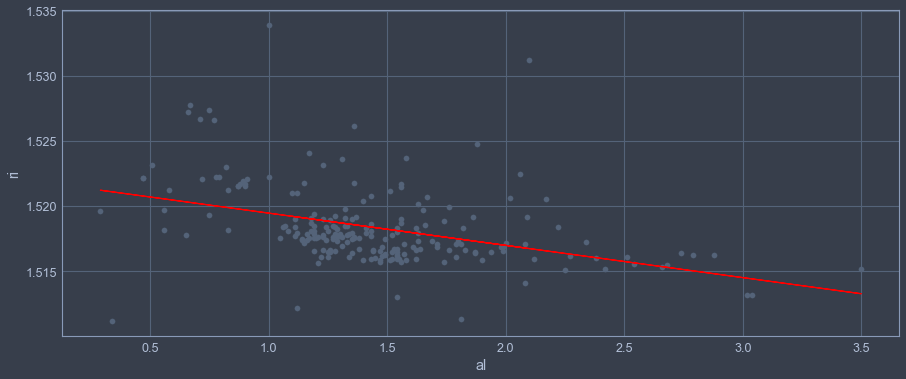

In [24]:
glass.plot(kind='scatter', x = 'al', y = 'ri',figsize=(15,6), s = 30)
plt.plot(glass.al, glass.y_pred, color = 'red')

# Predicting a Single Categorical Response

In [25]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1.519220
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1.518576
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1.518130
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1.518749
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1.518873
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1.514810
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1.517015
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1.516941
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1.517139


In [26]:
glass.glass_type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

#### For reference , the types are part of a broader glass types

- Window glass  : 1,2,3 
- Household glass : 5,6,7

In [31]:
# map window glass - > 0 and household glass to 1. Assign this to household column
# Create a dictionary of b

glass_dict = {1:0, 2:0,3:0, 5:1,6:1,7:1}
glass['household'] = glass['glass_type'].map(glass_dict)

Text(0, 0.5, 'window glass type')

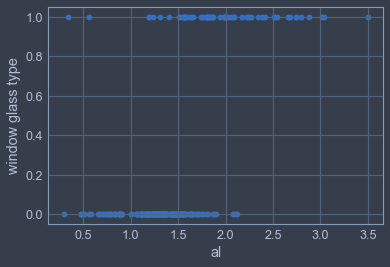

In [35]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('window glass type')

In [39]:
# Fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

lr = LinearRegression()
lr.fit(X,y)

y_household_pred = lr.predict(X)

glass['household_pred'] = y_household_pred

In [40]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1.519220,0,0.065459
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1.518576,0,0.195765
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1.518130,0,0.285976
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1.518749,0,0.160682
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1.518873,0,0.135623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1.514810,1,0.957554
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1.517015,1,0.511506
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1.516941,1,0.526541
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1.517139,1,0.486447


Text(0, 0.5, 'window glass type')

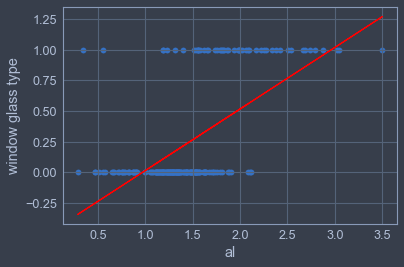

In [41]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color = 'red')
plt.xlabel('al')
plt.ylabel('window glass type')

In [43]:
# return the first value if the condition inside the np.where is met.

nums = np.array([5, 10, 15])

np.where(nums>10 , 'big', 'small')

array(['small', 'small', 'big'], dtype='<U5')

In [44]:
glass['household_pred_class'] = np.where(glass['household_pred'] >= 0.5, 1 , 0 )

In [45]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1.519220,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1.518576,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1.518130,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1.518749,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1.518873,0,0.135623,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1.514810,1,0.957554,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1.517015,1,0.511506,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1.516941,1,0.526541,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1.517139,1,0.486447,0


In [47]:
glass.sort_values('al', inplace= True)

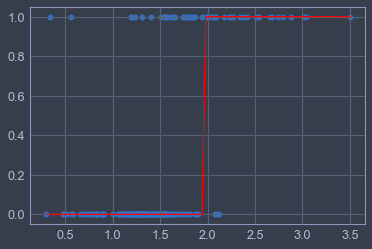

In [52]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')

In [56]:
# Fit a logistic regression model and store the class prediction
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']

X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)

pred = logreg.predict(X)

In [57]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
glass['household_prob'] = logreg.predict_proba(X)[:, 1]

In [63]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,1.521227,0,-0.340495,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1.521103,1,-0.315436,0,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,1.520781,0,-0.250283,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,1.520781,0,-0.250283,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,1.520682,0,-0.230236,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1.515033,1,0.912448,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1.514810,1,0.957554,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1.514463,1,1.027718,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1.514413,1,1.037742,1,0.969552


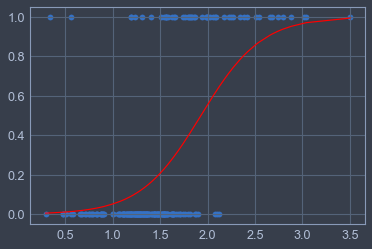

In [67]:
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_prob, color='red')

In [71]:
logreg.predict_proba([[2]])

array([[0.4449707, 0.5550293]])

In [72]:
logreg.predict_proba([[3]])

array([[0.03435025, 0.96564975]])

# Excercise 

In [85]:
# import logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create an X and y with X being whatever you want . Choose your own features
feature_cols = ['mg', 'ca','al']
# y will glass. household 
X  = glass[feature_cols]
y = glass.household
# split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
# instantiate model
logreg = LogisticRegression()
# fit the model with training data
logreg.fit(X_train, y_train)
# predict with testing data and assing results into a y_pred variable
y_pred = logreg.predict(X_test)

# we will test for accuracy

In [86]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
from sklearn import metrics

In [89]:
metrics.accuracy_score(y_test, y_pred)

0.9444444444444444